# Grover's Algorithm for 1 solution 

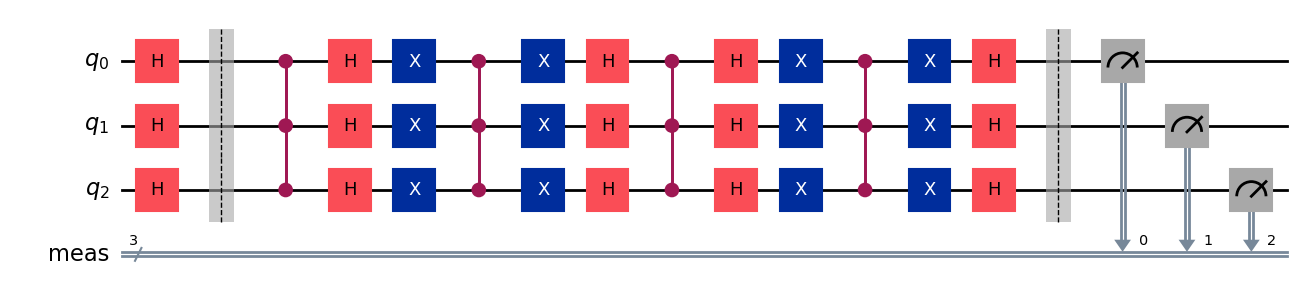

In [26]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt



qc = QuantumCircuit(3)     # Create quantum circuit: 3 input qubits


for i in range(3):  # Apply Hadamard to all input qubits
    qc.h(i)

qc.barrier()

#  Oracle for   marking |111>
qc.ccz(0,1,2)
for i in range(3):  # Apply Hadamard to all input qubits
    qc.h(i)
for i in range(3):  # Apply X gate to all input qubits  in order to mark |000>
    qc.x(i)
qc.ccz(0,1,2)
for i in range(3): # Apply X to all input qubits
    qc.x(i)
for i in range(3):# Apply Hadamard to all input qubits
    qc.h(i) 
    
#second iteration
qc.ccz(0,1,2)
for i in range(3):  # Apply Hadamard to all input qubits
    qc.h(i)
for i in range(3):  # Apply X gate to all input qubits  in order to mark |000>
    qc.x(i)
qc.ccz(0,1,2)
for i in range(3): # Apply X to all input qubits
    qc.x(i)
for i in range(3):# Apply Hadamard to all input qubits
    qc.h(i) 
    

# no. of iteration base on the formula here to get the max ouptput we need 2 iteration

state = Statevector.from_instruction(qc)
qc.measure_all()

qc.draw(output='mpl')  

    


In [27]:
print("Statevector after amplitude Magnifivation :\n")

for i in range(8):
    binary = format(i, '03b')
    real = round(state.data[i].real, 3)
    imag = round(state.data[i].imag, 3)
    print(f"|{binary}⟩: {real} + {imag}j")

Statevector after amplitude Magnifivation :

|000⟩: -0.088 + 0.0j
|001⟩: -0.088 + 0.0j
|010⟩: -0.088 + 0.0j
|011⟩: -0.088 + 0.0j
|100⟩: -0.088 + 0.0j
|101⟩: -0.088 + 0.0j
|110⟩: -0.088 + 0.0j
|111⟩: 0.972 + 0.0j


In [28]:

from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)


Measurement Results: {'111': 3875, '001': 27, '000': 37, '100': 26, '011': 36, '010': 30, '110': 36, '101': 29}


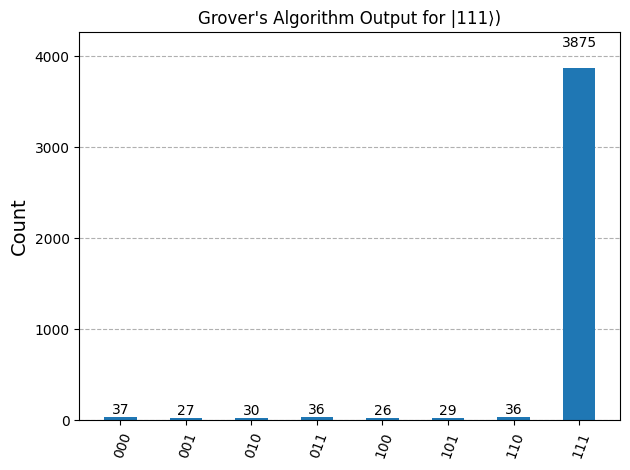

In [29]:
plot_histogram(counts , title="Grover's Algorithm Output for |111⟩)")